(36039, 10)
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
81.3556030297145
-34.00652280763368
             precision    recall  f1-score   support

          0       1.00      0.81      0.89      4997
          1       0.14      0.99      0.24       152

avg / total       0.97      0.81      0.87      5149

(36039, 10)
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
88.87162555836085
-4.4171221219603405
             precision    recall  f1-score   support

          0       1.00      0.89      0.94      4950
          1       0.25      0.97      0.40       199

avg / total       0.97      0.89      0.92      5149

(36039, 10)
[0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0

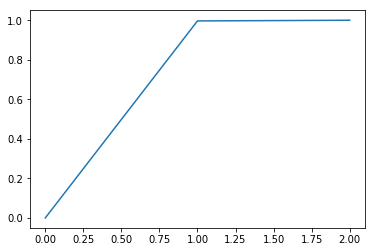

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.metrics import confusion_matrix

data3 = pd.read_csv("bank_additional-full-oneHot.csv")
data3.loc[data3["y"]=="no", "y"] = 0
data3.loc[data3["y"]=="yes", "y"] = 1

#data3 = data3.as_matrix()
kf = KFold(n_splits = 8) 

data3 = data3.as_matrix()

pca = PCA(10)
#data3 = pca.fit_transform(data3)
scores = []
for train_index, test_index in kf.split(data3):
    
    train, test = data3[train_index], data3[test_index]
    #get train labels
    train_labels = train[:,11]
    #remove train labels
    train = np.delete(train,11,1)
    
    
    #normalize training
    train = (train-train.min())/(train.max()-train.min())
    
    #apply pca
    train = pca.fit_transform(train)
    print(train.shape)
    
    #get test labels
    test_labels = test[:,11]
    test_labels = test_labels.astype(int)
    
    #remove test labels
    test = np.delete(test,11,1)
    
    #normalize testing
    test = (test-test.min())/(test.max()-test.min())
    
    #apply pca
    test = pca.fit_transform(test)
    
    #now predict using Linear Regression
    linear_reg = LinearRegression()
    
    linear_reg.fit(train, train_labels)
    
    #predict using resulting coefficients
    y_pred = linear_reg.predict(test)
    y_pred[y_pred>0.5] = 1
    y_pred[y_pred<=0.5] = 0
    y_pred = y_pred.astype(int)
    
    
    print(y_pred[0:50])
    print(test_labels[0:50])
    accuracy  = np.count_nonzero(y_pred==test_labels)/len(y_pred) * 100
    print(accuracy)
    
    #get scores
    #mse = np.sqrt((test_labels-y_pred)**2)/len(y_pred)
    #threshold = mse.mean()
    
    score = linear_reg.score(test, test_labels)
    print(score)
    scores.append(score)
    report = classification_report(test_labels, y_pred)
    
    print(report)
    #print ROC curve
    tpr, fpr, _ = roc_curve(test_labels, -y_pred)
    
plt.plot(tpr)    
plt.show()